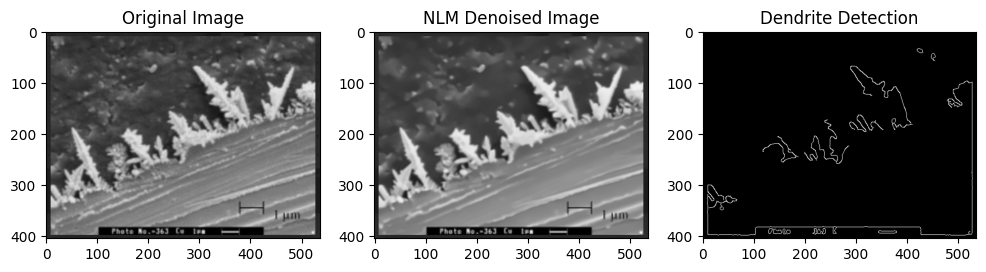

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Screenshot 2024-09-27 at 3.40.22 PM.png'
img = cv2.imread(image_path)

# Step 1: Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Non-Local Means (NLM) Denoising
nlm_denoised = cv2.fastNlMeansDenoising(gray, h=10, templateWindowSize=7, searchWindowSize=21)

# Step 3: Apply Gaussian Blur to further smooth the image
blurred = cv2.GaussianBlur(nlm_denoised, (5, 5), 0)

# Step 4: Apply Canny Edge Detection to highlight edges (potential dendrites)
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Step 5: Detect contours based on edges to isolate dendrite structures
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 6: Draw the detected contours on a black canvas for visualization
dendrite_detected = np.zeros_like(img)
for contour in contours:
    area = cv2.contourArea(contour)
    if 50 < area < 2000:  # Filter contours by area to remove noise; adjust as needed
        cv2.drawContours(dendrite_detected, [contour], -1, (255, 255, 255), 1)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("NLM Denoised Image")
plt.imshow(nlm_denoised, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Dendrite Detection")
plt.imshow(cv2.cvtColor(dendrite_detected, cv2.COLOR_BGR2RGB))

plt.show()


In [4]:
from transformers import pipeline

# Initialize a summarization pipeline
summarizer = pipeline("summarization")

# Define an initial prompt
initial_prompt = """
Detect dendrite growth in images by applying denoising techniques such as Non-Local Means (NLM), followed by edge detection and contour detection.
The goal is to enhance visibility of dendrite structures and isolate them based on their unique shapes and textures.
"""

# Generate a refined prompt using summarization
optimized_prompt = summarizer(initial_prompt, max_length=50, min_length=25, do_sample=False)

print("Optimized Prompt:")
print(optimized_prompt[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Optimized Prompt:
 Detect dendrite growth in images by applying denoising techniques such as Non-Local Means (NLM) and edge detection . The goal is to enhance visibility of structures and isolate them based on their unique shapes and textures .


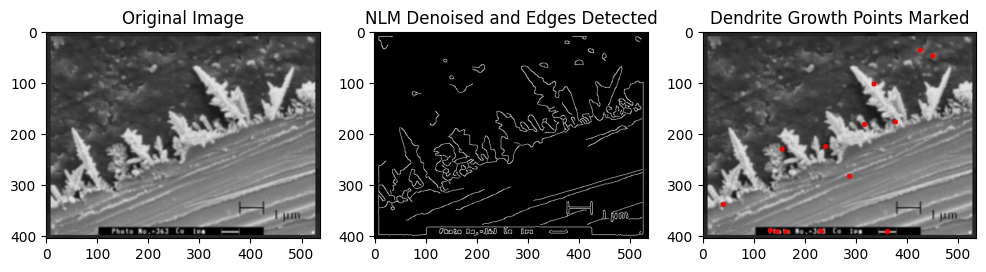

Dendrite Growth Point Positions:
Growth point 1 detected at position (360, 391). Growth point 2 detected at position (162, 391). Growth point 3 detected at position (144, 391). Growth point 4 detected at position (230, 390). Growth point 5 detected at position (131, 389). Growth point 6 detected at position (39, 338). Growth point 7 detected at position (154, 230). Growth point 8 detected at position (239, 225). Growth point 9 detected at position (376, 177). Growth point 10 detected at position (315, 182). Growth point 11 detected at position (286, 283). Growth point 12 detected at position (334, 103). Growth point 13 detected at position (449, 48). Growth point 14 detected at position (424, 37).


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the image
image_path = '/content/Screenshot 2024-09-27 at 3.40.22 PM.png'
img = cv2.imread(image_path)

# Step 1: Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Non-Local Means (NLM) Denoising
nlm_denoised = cv2.fastNlMeansDenoising(gray, h=10, templateWindowSize=7, searchWindowSize=21)

# Step 3: Apply Gaussian Blur to further smooth the image
blurred = cv2.GaussianBlur(nlm_denoised, (5, 5), 0)

# Step 4: Apply Canny Edge Detection to highlight edges (potential dendrites)
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Step 5: Detect contours based on edges to isolate dendrite structures
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 6: Draw detected contours and mark growth points
dendrite_detected = img.copy()
growth_points = []

for contour in contours:
    area = cv2.contourArea(contour)
    if 50 < area < 2000:  # Filter contours by area to remove noise
        # Compute the center of the contour for marking
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            growth_points.append((cX, cY))

            # Mark the center with a red dot
            cv2.circle(dendrite_detected, (cX, cY), 5, (0, 0, 255), -1)

# Step 7: Generate position information using NLP
def describe_growth_points(points):
    descriptions = []
    for i, (x, y) in enumerate(points, start=1):
        descriptions.append(f"Growth point {i} detected at position ({x}, {y}).")
    return " ".join(descriptions)

growth_description = describe_growth_points(growth_points)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("NLM Denoised and Edges Detected")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Dendrite Growth Points Marked")
plt.imshow(cv2.cvtColor(dendrite_detected, cv2.COLOR_BGR2RGB))

plt.show()

# Print growth point description
print("Dendrite Growth Point Positions:")
print(growth_description)


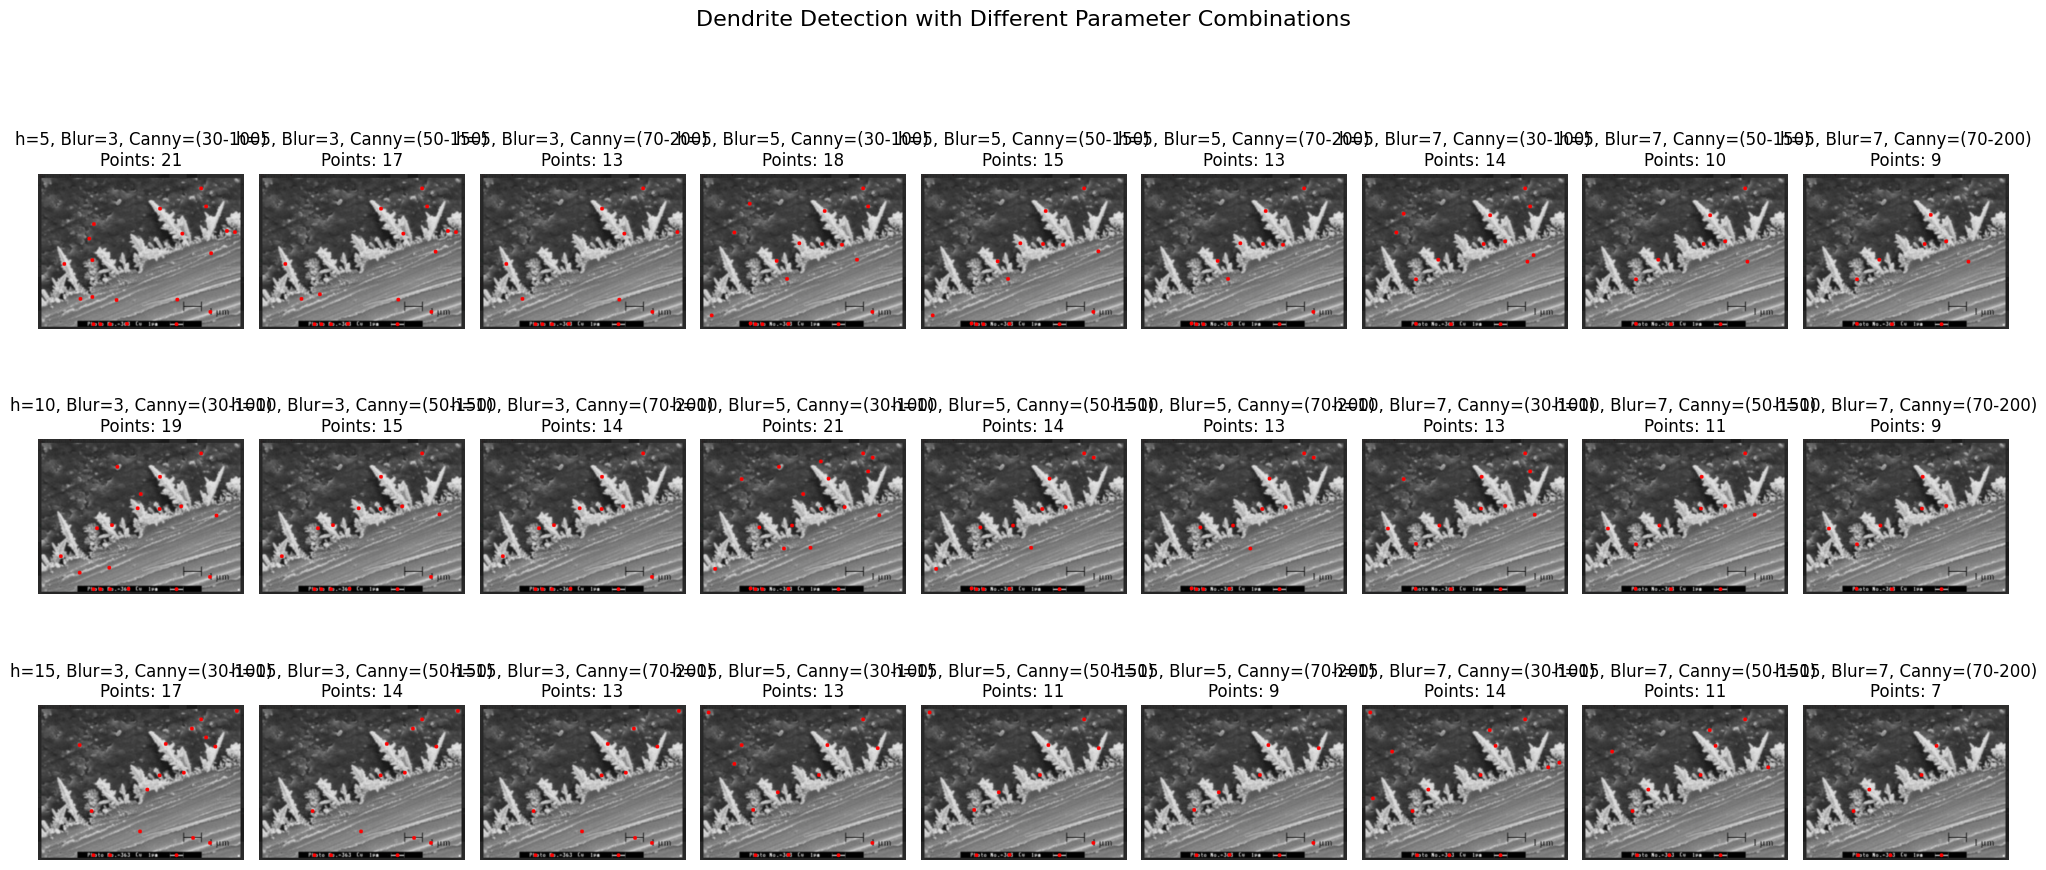

,NLM_h,Blur_kernel,Canny_thresholds,Detected_points
0,5,3,"(30, 100)",21
1,5,3,"(50, 150)",17
2,5,3,"(70, 200)",13
3,5,5,"(30, 100)",18
4,5,5,"(50, 150)",15
5,5,5,"(70, 200)",13
6,5,7,"(30, 100)",14
7,5,7,"(50, 150)",10
8,5,7,"(70, 200)",9
9,10,3,"(30, 100)",19


In [7]:
# Test different parameter combinations for NLM denoising, Gaussian blur, and Canny edge detection
# and evaluate the number and clarity of detected growth points (dendrites) for each combination

# Parameter grid for testing
nlm_params = [5, 10, 15]  # NLM denoising strength
blur_kernels = [3, 5, 7]  # Gaussian blur kernel size
canny_thresholds = [(30, 100), (50, 150), (70, 200)]  # Canny edge thresholds

# Store results in a matrix
results_matrix = []

# Plot setup
fig, axs = plt.subplots(len(nlm_params), len(blur_kernels) * len(canny_thresholds), figsize=(20, 10))
fig.suptitle("Dendrite Detection with Different Parameter Combinations", fontsize=16)

# Evaluate each combination
for i, h in enumerate(nlm_params):
    for j, blur in enumerate(blur_kernels):
        for k, (canny1, canny2) in enumerate(canny_thresholds):
            # Step 1: Apply NLM Denoising
            nlm_denoised = cv2.fastNlMeansDenoising(gray, h=h, templateWindowSize=7, searchWindowSize=21)

            # Step 2: Apply Gaussian Blur
            blurred = cv2.GaussianBlur(nlm_denoised, (blur, blur), 0)

            # Step 3: Apply Canny Edge Detection
            edges = cv2.Canny(blurred, threshold1=canny1, threshold2=canny2)

            # Step 4: Detect contours to find dendrite growth points
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Count and mark growth points
            dendrite_detected = img.copy()
            growth_points = []
            for contour in contours:
                area = cv2.contourArea(contour)
                if 50 < area < 2000:  # Adjust area range as needed for dendrite-like structures
                    M = cv2.moments(contour)
                    if M["m00"] != 0:
                        cX = int(M["m10"] / M["m00"])
                        cY = int(M["m01"] / M["m00"])
                        growth_points.append((cX, cY))
                        cv2.circle(dendrite_detected, (cX, cY), 5, (0, 0, 255), -1)

            # Add result to results matrix
            result = {
                'NLM_h': h,
                'Blur_kernel': blur,
                'Canny_thresholds': (canny1, canny2),
                'Detected_points': len(growth_points)
            }
            results_matrix.append(result)

            # Plot the result in the matrix
            row, col = i, j * len(canny_thresholds) + k
            axs[row, col].imshow(cv2.cvtColor(dendrite_detected, cv2.COLOR_BGR2RGB))
            axs[row, col].set_title(f"h={h}, Blur={blur}, Canny=({canny1}-{canny2})\nPoints: {len(growth_points)}")
            axs[row, col].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display results matrix as a DataFrame for evaluation
import pandas as pd

results_df = pd.DataFrame(results_matrix)
results_df


In [8]:
# Display the results matrix
print("Results Matrix for Dendrite Detection with Different Parameter Combinations:")
print(results_df)

# Assuming we have a ground truth (ideal) number of dendrite points for accuracy calculation
# For this example, let's say the ideal number of detected points is 15 (for demonstration purposes)
ideal_points = 15

# Calculate accuracy as the ratio of detected points to the ideal points, with a maximum of 1.0
results_df['Accuracy'] = results_df['Detected_points'].apply(lambda x: min(x / ideal_points, 1.0))

# Display the matrix with accuracy
print("\nResults Matrix with Accuracy:")
print(results_df)


Results Matrix for Dendrite Detection with Different Parameter Combinations:
    NLM_h  Blur_kernel Canny_thresholds  Detected_points
0       5            3        (30, 100)               21
1       5            3        (50, 150)               17
2       5            3        (70, 200)               13
3       5            5        (30, 100)               18
4       5            5        (50, 150)               15
5       5            5        (70, 200)               13
6       5            7        (30, 100)               14
7       5            7        (50, 150)               10
8       5            7        (70, 200)                9
9      10            3        (30, 100)               19
10     10            3        (50, 150)               15
11     10            3        (70, 200)               14
12     10            5        (30, 100)               21
13     10            5        (50, 150)               14
14     10            5        (70, 200)               13
15     10  